In [14]:
from statsmodels.formula.api import glm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
family= sm.families.Gaussian()
from sklearn.model_selection import train_test_split
#importing dataset and removing uncessary columns which cannot be really understood by the algorithm
df = pd.read_excel('aggregate_ic.xlsx')
df.drop('Sample No.',axis =1 ,inplace= True)
X= df.drop('WSA',axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,df['WSA'],test_size=0.2)
df= df.sample(frac=1)
y_train.std()

4.002321241180467

In [3]:
#declaring the model
formula="WSA ~ Clay +Sand+ Silt + Bd + SOM + pH"
model= glm(formula = formula, data= df,family=family).fit()

In [4]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    WSA   No. Observations:                   73
Model:                            GLM   Df Residuals:                       67
Model Family:                Gaussian   Df Model:                            5
Link Function:               identity   Scale:                          9.9426
Method:                          IRLS   Log-Likelihood:                -184.29
Date:                Sat, 07 May 2022   Deviance:                       666.15
Time:                        09:49:37   Pearson chi2:                     666.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0044      0.002      1.933      0.053   -6.15e-05       0.009
Clay           0.0242      0.132      0.183      0.855      -0.235       0.284
Sand           0.3176      0.072      4.437      0.000       0.177       0.458
Silt           0.0977      0.083      1.179      0.238      -0.065       0.260
Bd             2.7019      2.978      0.907      0.364      -3.135       8.539
SOM           -4.5656      3.027     -1.508      0.132     -10.499       1.368
pH            -0.4093      0.516     -0.794      0.427      -1.420       0.602
==============================================================================
"""

In [6]:
#covariance
model.cov_params()

,Intercept,Clay,Sand,Silt,Bd,SOM,pH
Intercept,0.000005,0.000236,0.000120,0.000161,-0.005342,-0.000259,-0.000713
Clay,0.000236,0.017536,0.001799,0.004237,-0.156680,-0.015684,-0.028138
Sand,0.000120,0.001799,0.005123,0.005052,-0.171029,0.011711,-0.017268
Silt,0.000161,0.004237,0.005052,0.006860,-0.206530,-0.021894,-0.025910
Bd,-0.005342,-0.156680,-0.171029,-0.206530,8.869136,-0.693949,0.240038
SOM,-0.000259,-0.015684,0.011711,-0.021894,-0.693949,9.165129,-0.076660
pH,-0.000713,-0.028138,-0.017268,-0.025910,0.240038,-0.076660,0.266017


In [ ]:
#prediction & target
pred = np.array(model.predict(exog=df))
target = np.array(df['WSA'])


In [ ]:
#metrics
from sklearn.metrics import r2_score, mean_absolute_error
r2 = r2_score(target,pred)
print("The coefficient of determination is "+str(r2))

mae = mean_absolute_error(target,pred)
print("Mean Absolute Error is " +  str(mae))

# self made rmse function 
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

rmse_value = rmse(pred,target)
print("RMSE Value is "+str(rmse_value))

#adjusted R^2
n= 73
p=7
x= 1-r2
y=(n-1)/(n-p-1)

adj_r2= 1-(x*y)

print('Adjusted R^2 is '+str(adj_r2))

The coefficient of determination is 0.41465730829630776
Mean Absolute Error is 2.4053051393471288
RMSE Value is 3.0208253723142073
Adjusted R^2 is 0.35162040303591013


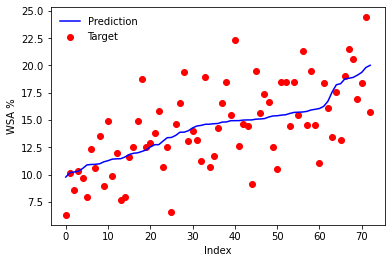

In [ ]:
#final graph with predictions and Target Values
fig , ax= plt.subplots()
index= list(range(len(pred)))
ax.set_xlabel("Index")
ax.set_ylabel("WSA %")

pred_target=pd.DataFrame(list(zip(pred,target)))
pred_target.head()
pred_target.sort_values(by=0,inplace = True)
plt.plot(index,pred_target[0],c='blue',label= "Prediction")
plt.scatter(index,pred_target[1],c='red',label='Target')
plt.legend(loc='upper left',frameon = False)
plt.show(fig)
fig.savefig('glm.svg',dpi=1600)
